In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
data=pd.read_csv(r"D:\Data Set\train.csv")

In [32]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [33]:
cat=data.select_dtypes(include='object')

In [34]:
percent=cat.isnull().sum()/cat.shape[0]*100
percent

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [35]:
dropc=percent[percent>30].keys()
dropc

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [36]:
cat.drop(columns=dropc,axis=1,inplace=True)

In [37]:
# accesing required all columns
isnull=cat.isnull().sum()/cat.shape[0]*100
miss_var=isnull[isnull>0].keys()
miss_var

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [38]:
#accessing mode value
cat['BsmtQual'].mode()

0    TA
Name: BsmtQual, dtype: object

In [39]:
cat['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [40]:
#filling values
cat['BsmtQual'].fillna(cat['BsmtQual'].mode())

0        Gd
1        Gd
2        Gd
3        TA
4        Gd
5        Gd
6        Ex
7        Gd
8        TA
9        TA
10       TA
11       Ex
12       TA
13       Gd
14       TA
15       TA
16       TA
17      NaN
18       TA
19       TA
20       Ex
21       TA
22       Gd
23       Gd
24       TA
25       Gd
26       TA
27       Ex
28       TA
29       TA
30       TA
31       TA
32       Ex
33       TA
34       Ex
35       Ex
36       Gd
37       TA
38       TA
39      NaN
40       TA
41       TA
42       Gd
43       Gd
44       TA
45       Ex
46       Ex
47       Gd
48       TA
49       TA
50       Gd
51       TA
52       Gd
53       Ex
54       TA
55       TA
56       Gd
57       Gd
58       Ex
59       TA
60       Gd
61       TA
62       Gd
63       TA
64       Gd
65       Ex
66       Gd
67       Gd
68       TA
69       TA
70       Gd
71       TA
72       Gd
73       TA
74       Fa
75       Gd
76       TA
77       TA
78       TA
79       TA
80       Gd
81       Ex
82       Gd
83  

In [41]:
data['MasVnrType'].fillna("Missing",inplace=True)

In [42]:
data['MasVnrType'].isnull().sum()

0

In [51]:
for var in miss_var:
    cat[var].fillna(cat[var].mode()[0],inplace=True)
    print(var,"=",data[var].mode()[0])

BsmtQual = TA
BsmtCond = TA
BsmtExposure = No
BsmtFinType1 = Unf
BsmtFinType2 = Unf
Electrical = SBrkr
GarageType = Attchd
GarageFinish = Unf
GarageQual = TA
GarageCond = TA


In [52]:
cat.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

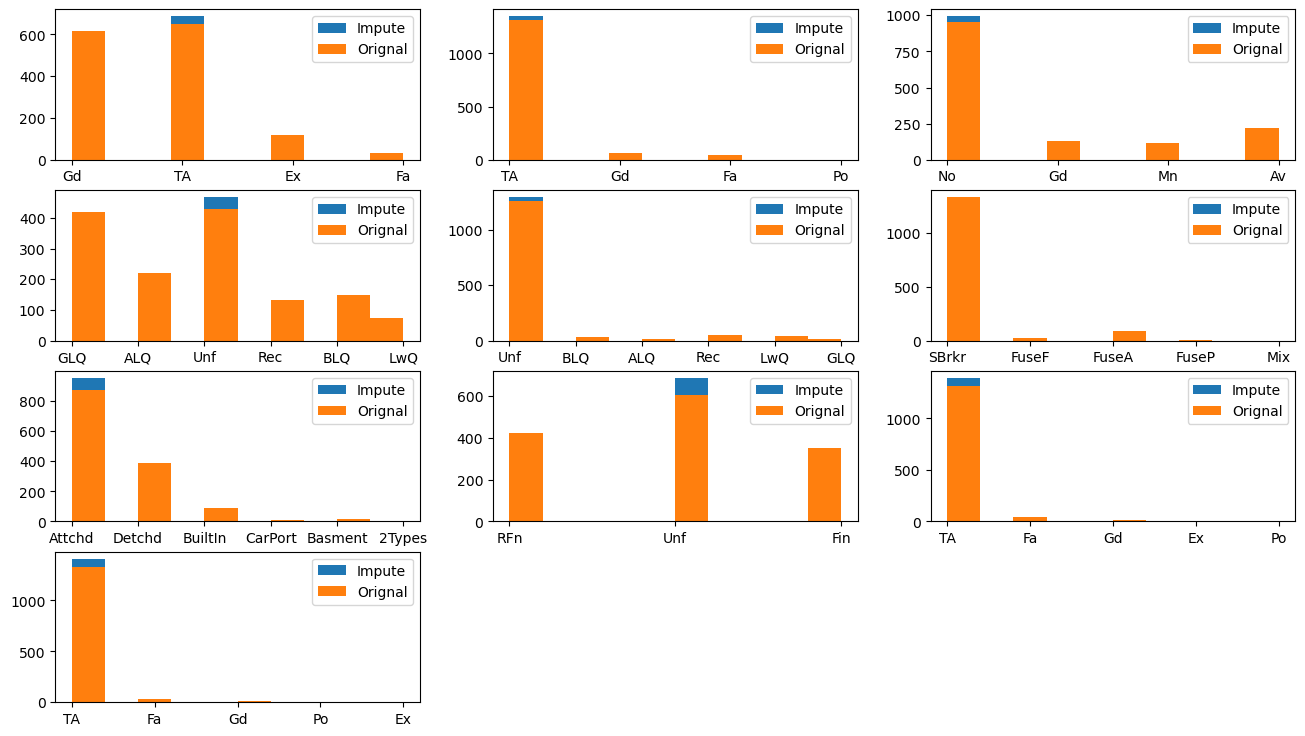

In [53]:
#viewing distribution
plt.figure(figsize=(16,9))
for i,var  in enumerate(miss_var):
    plt.subplot(4,3,i+1)
    plt.hist(cat[var],label="Impute")
    plt.hist(data[var].dropna(),label="Orignal")
    plt.legend()

In [54]:
#Update in new data
data.update(cat)
data.drop(columns=dropc,inplace=True)

In [55]:
#cross checking
data.select_dtypes(include="object").isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64